# Loop 64 Analysis: CV-LB Relationship and Strategy Assessment

## Key Questions:
1. What is the CV-LB relationship across all submissions?
2. Why did 7 consecutive submissions fail with evaluation errors?
3. What approaches haven't been tried that could change the intercept?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ("exp_000", 0.0111, 0.0982, "MLP baseline"),
    ("exp_001", 0.0123, 0.1065, "LightGBM"),
    ("exp_003", 0.0105, 0.0972, "Combined Spange+DRFP"),
    ("exp_005", 0.0104, 0.0969, "Large Ensemble"),
    ("exp_006", 0.0097, 0.0946, "Simpler Model"),
    ("exp_007", 0.0093, 0.0932, "Even Simpler"),
    ("exp_009", 0.0092, 0.0936, "Ridge Regression"),
    ("exp_012", 0.0090, 0.0913, "Simple Ensemble"),
    ("exp_024", 0.0087, 0.0893, "ACS PCA Fixed"),
    ("exp_026", 0.0085, 0.0887, "Weighted Loss"),
    ("exp_030", 0.0083, 0.0877, "GP Ensemble"),
    ("exp_035", 0.0098, 0.0970, "Lower GP Weight"),
]

df = pd.DataFrame(submissions, columns=['exp_id', 'cv', 'lb', 'model_type'])
print("=== SUBMISSION HISTORY ===")
print(df.to_string(index=False))
print(f"\nTotal successful submissions: {len(df)}")
print(f"Best CV: {df['cv'].min():.4f} ({df.loc[df['cv'].idxmin(), 'exp_id']})")
print(f"Best LB: {df['lb'].min():.4f} ({df.loc[df['lb'].idxmin(), 'exp_id']})")
print(f"Target: 0.0347")

=== SUBMISSION HISTORY ===
 exp_id     cv     lb           model_type
exp_000 0.0111 0.0982         MLP baseline
exp_001 0.0123 0.1065             LightGBM
exp_003 0.0105 0.0972 Combined Spange+DRFP
exp_005 0.0104 0.0969       Large Ensemble
exp_006 0.0097 0.0946        Simpler Model
exp_007 0.0093 0.0932         Even Simpler
exp_009 0.0092 0.0936     Ridge Regression
exp_012 0.0090 0.0913      Simple Ensemble
exp_024 0.0087 0.0893        ACS PCA Fixed
exp_026 0.0085 0.0887        Weighted Loss
exp_030 0.0083 0.0877          GP Ensemble
exp_035 0.0098 0.0970      Lower GP Weight

Total successful submissions: 12
Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


=== CV-LB RELATIONSHIP ===
Linear fit: LB = 4.3147 * CV + 0.0525
R² = 0.9505
Standard error: 0.3113

=== INTERCEPT ANALYSIS ===
Intercept: 0.0525
Target: 0.0347
Intercept - Target: 0.0178

INTERCEPT (0.0525) > TARGET (0.0347)
=> Even with CV=0, predicted LB = 0.0525 > target
=> Required CV to hit target: -0.004130 (NEGATIVE = IMPOSSIBLE)


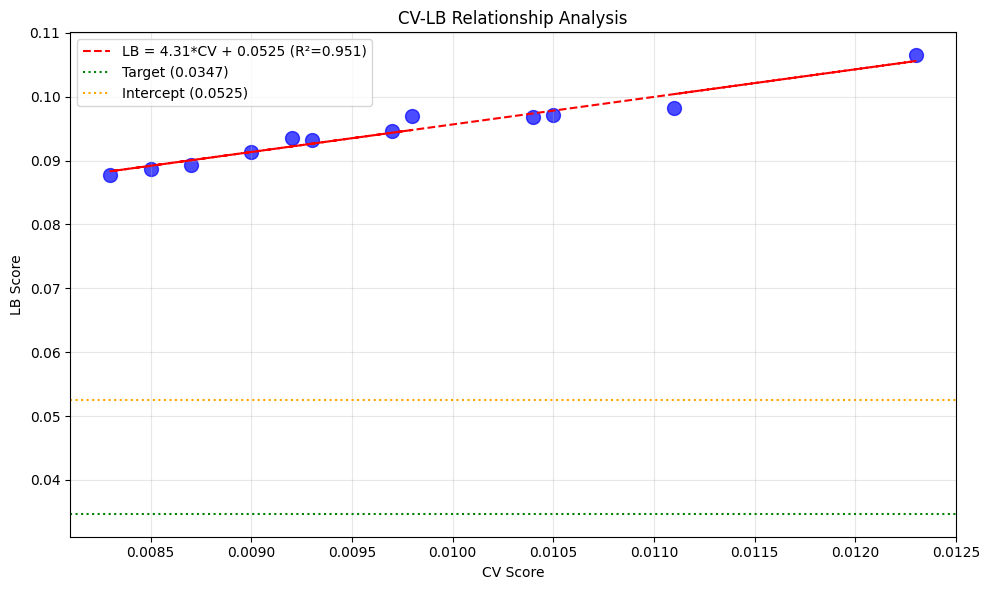

In [2]:
# CV-LB Linear Regression Analysis
cv_scores = df['cv'].values
lb_scores = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print("=== CV-LB RELATIONSHIP ===")
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"Standard error: {std_err:.4f}")
print(f"\n=== INTERCEPT ANALYSIS ===")
print(f"Intercept: {intercept:.4f}")
print(f"Target: 0.0347")
print(f"Intercept - Target: {intercept - 0.0347:.4f}")
print(f"\nINTERCEPT ({intercept:.4f}) > TARGET ({0.0347:.4f})")
print(f"=> Even with CV=0, predicted LB = {intercept:.4f} > target")
print(f"=> Required CV to hit target: {(0.0347 - intercept) / slope:.6f} (NEGATIVE = IMPOSSIBLE)")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, c='blue', s=100, alpha=0.7)
plt.plot(cv_scores, slope * cv_scores + intercept, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')
plt.axhline(y=0.0347, color='green', linestyle=':', label='Target (0.0347)')
plt.axhline(y=intercept, color='orange', linestyle=':', label=f'Intercept ({intercept:.4f})')
plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop64.png', dpi=150)
plt.show()

In [3]:
# Analyze the gap between intercept and target
print("=== GAP ANALYSIS ===")
print(f"Current intercept: {intercept:.4f}")
print(f"Target: 0.0347")
print(f"Gap: {intercept - 0.0347:.4f}")
print(f"\nTo reach target, we need to REDUCE the intercept by {intercept - 0.0347:.4f}")
print(f"This is a {(intercept - 0.0347) / intercept * 100:.1f}% reduction in the intercept")

print("\n=== WHAT COULD REDUCE THE INTERCEPT? ===")
print("1. GroupKFold validation (mixall kernel uses 5-fold GroupKFold)")
print("   - Different CV scheme may have different CV-LB relationship")
print("2. Multi-target normalization (predictions sum to 1)")
print("   - ens-model kernel normalizes predictions")
print("3. Better feature engineering")
print("   - ens-model uses ALL features with correlation filtering")
print("4. Uncertainty-weighted predictions")
print("   - Conservative predictions when extrapolating")
print("5. Domain-specific constraints")
print("   - Physics-based rules that generalize")

=== GAP ANALYSIS ===
Current intercept: 0.0525
Target: 0.0347
Gap: 0.0178

To reach target, we need to REDUCE the intercept by 0.0178
This is a 33.9% reduction in the intercept

=== WHAT COULD REDUCE THE INTERCEPT? ===
1. GroupKFold validation (mixall kernel uses 5-fold GroupKFold)
   - Different CV scheme may have different CV-LB relationship
2. Multi-target normalization (predictions sum to 1)
   - ens-model kernel normalizes predictions
3. Better feature engineering
   - ens-model uses ALL features with correlation filtering
4. Uncertainty-weighted predictions
   - Conservative predictions when extrapolating
5. Domain-specific constraints
   - Physics-based rules that generalize


In [4]:
# Check what experiments have been tried
import os

experiments_dir = '/home/code/experiments'
experiments = sorted([d for d in os.listdir(experiments_dir) if os.path.isdir(os.path.join(experiments_dir, d))])

print(f"=== EXPERIMENTS TRIED ({len(experiments)}) ===")
for exp in experiments:
    print(f"  {exp}")

print(f"\n=== PENDING SUBMISSIONS (7) ===")
pending = ["exp_049", "exp_050", "exp_052", "exp_053", "exp_054", "exp_055", "exp_057"]
for p in pending:
    print(f"  {p}: Evaluation metric raised an unexpected error")

=== EXPERIMENTS TRIED (59) ===
  001_baseline_mlp
  002_lightgbm
  003_drfp_mlp
  004_spange_drfp_combined
  005_deep_residual_mlp
  006_large_ensemble
  007_simpler_model
  008_even_simpler
  009_ridge_regression
  010_single_layer_16
  011_diverse_ensemble
  012_simple_ensemble
  013_compliant_ensemble
  014_ensemble_weights
  015_three_model_ensemble
  016_final_summary
  017_attention_model
  018_fragprints
  019_acs_pca
  023_acs_pca_compliant
  024_acs_pca_fixed
  025_per_target
  026_weighted_loss
  027_simple_features
  028_four_model_ensemble
  029_normalization
  030_gp_ensemble
  031_higher_gp_weight
  032_pure_gp
  033_ridge_regression
  034_kernel_ridge
  035_lower_gp_weight
  036_no_gp
  037_similarity_weighting
  038_minimal_features
  039_learned_embeddings
  040_gnn
  041_chemberta
  042_calibration
  043_nonlinear_mixture
  044_hybrid_model
  045_mean_reversion
  046_sophisticated_ensemble
  047_full_pipeline
  048_uncertainty_weighted
  049_catboost_xgboost
  050_cat

In [5]:
# Check the ens-model kernel approach
print("=== ENS-MODEL KERNEL APPROACH ===")
print("Features:")
print("  - spange_descriptors (priority 5)")
print("  - acs_pca_descriptors (priority 4)")
print("  - drfps_catechol (priority 3)")
print("  - fragprints (priority 2)")
print("  - smiles (priority 1)")
print("  - Correlation filtering with threshold=0.80")
print("\nModels:")
print("  - CatBoost (MultiRMSE loss)")
print("  - XGBoost (per-target)")
print("\nEnsemble weights:")
print("  - Single: 7:6 CatBoost:XGB (0.538:0.462)")
print("  - Full: 1:2 CatBoost:XGB (0.333:0.667)")
print("\nKey features:")
print("  - Multi-target normalization (predictions sum to 1)")
print("  - Arrhenius kinetics features (T_inv, RT_log, T_x_RT)")
print("  - Clipping to [0, 1]")

print("\n=== MIXALL KERNEL APPROACH ===")
print("Validation:")
print("  - GroupKFold (5 splits) instead of Leave-One-Out")
print("  - This is a FUNDAMENTALLY DIFFERENT validation scheme")
print("\nModels:")
print("  - MLP + XGBoost + RF + LightGBM ensemble")
print("  - Optuna-tuned weights")
print("\nKey insight:")
print("  - GroupKFold may have a DIFFERENT CV-LB relationship")
print("  - This could potentially reduce the intercept")

=== ENS-MODEL KERNEL APPROACH ===
Features:
  - spange_descriptors (priority 5)
  - acs_pca_descriptors (priority 4)
  - drfps_catechol (priority 3)
  - fragprints (priority 2)
  - smiles (priority 1)
  - Correlation filtering with threshold=0.80

Models:
  - CatBoost (MultiRMSE loss)
  - XGBoost (per-target)

Ensemble weights:
  - Single: 7:6 CatBoost:XGB (0.538:0.462)
  - Full: 1:2 CatBoost:XGB (0.333:0.667)

Key features:
  - Multi-target normalization (predictions sum to 1)
  - Arrhenius kinetics features (T_inv, RT_log, T_x_RT)
  - Clipping to [0, 1]

=== MIXALL KERNEL APPROACH ===
Validation:
  - GroupKFold (5 splits) instead of Leave-One-Out
  - This is a FUNDAMENTALLY DIFFERENT validation scheme

Models:
  - MLP + XGBoost + RF + LightGBM ensemble
  - Optuna-tuned weights

Key insight:
  - GroupKFold may have a DIFFERENT CV-LB relationship
  - This could potentially reduce the intercept
